In [7]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

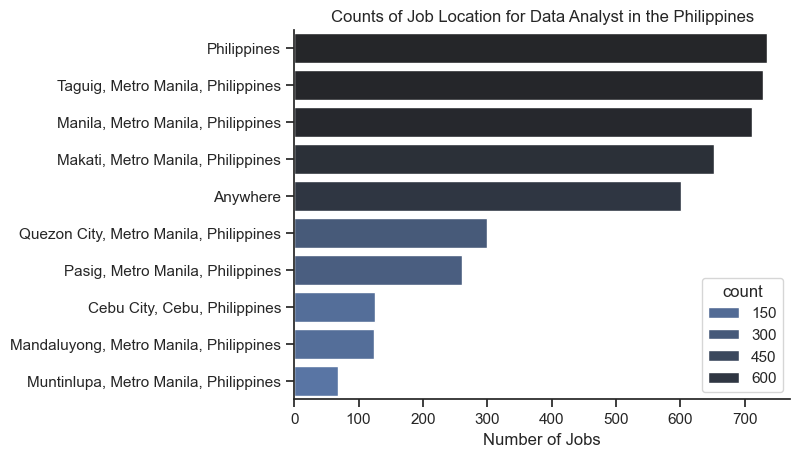

In [16]:
df_DA_Phil = df[(df['job_country'] == 'Philippines') & (df['job_title_short'] == 'Data Analyst')] 
df_plot = df_DA_Phil['job_location'].value_counts().head(10).to_frame()  

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Job Location for Data Analyst in the Philippines')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


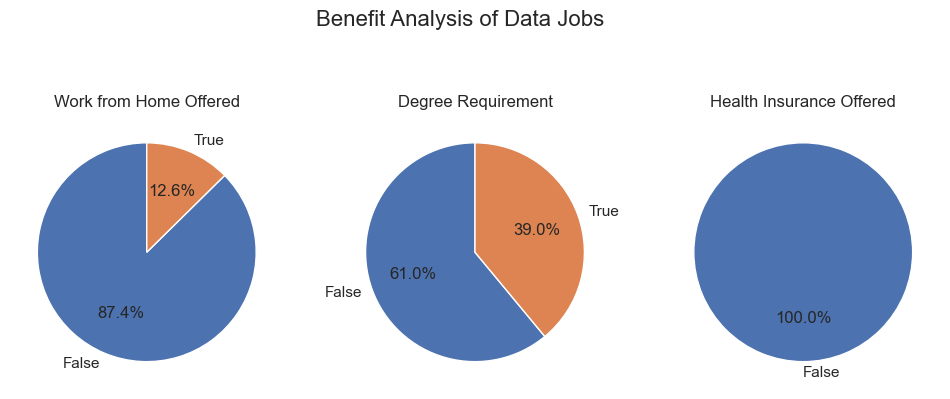

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    # ax[i].pie(df_DA_Phil[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90) 
    counts = df_DA_Phil[column].value_counts()
    labels = counts.index.map(lambda x: "True" if x else "False")
    ax[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

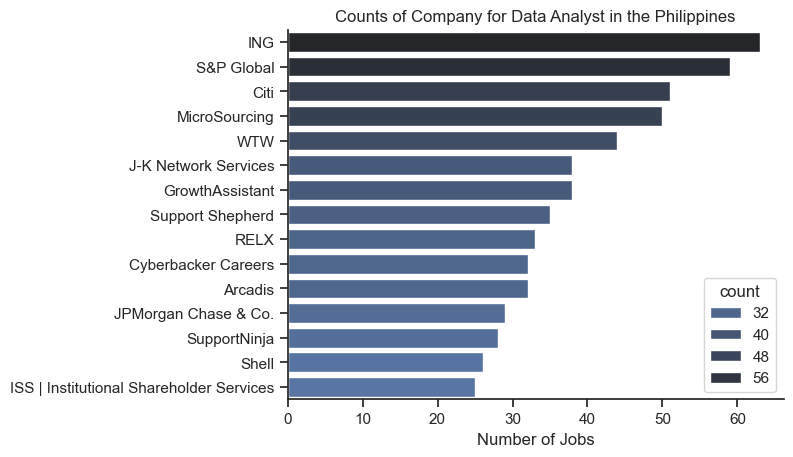

In [23]:
df_plot = df_DA_Phil['company_name'].value_counts().head(15).to_frame()  

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Company for Data Analyst in the Philippines')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


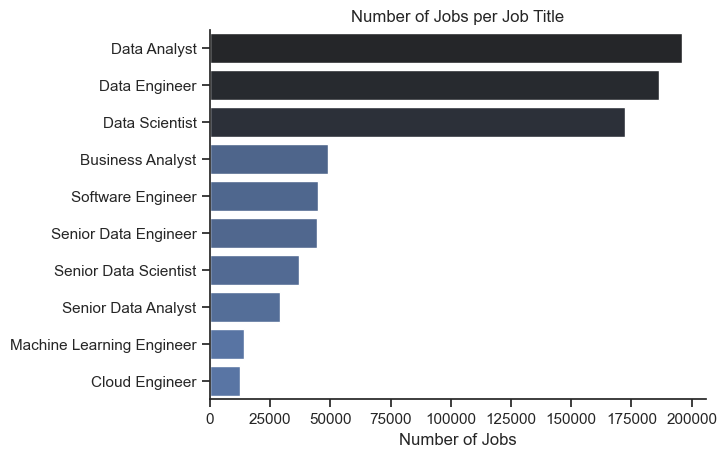

In [22]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()